In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("glass.csv")
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
data.drop("Type", axis = 1, inplace = True)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [8]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


Text(0.5, 1.0, 'Matriz de correlación')

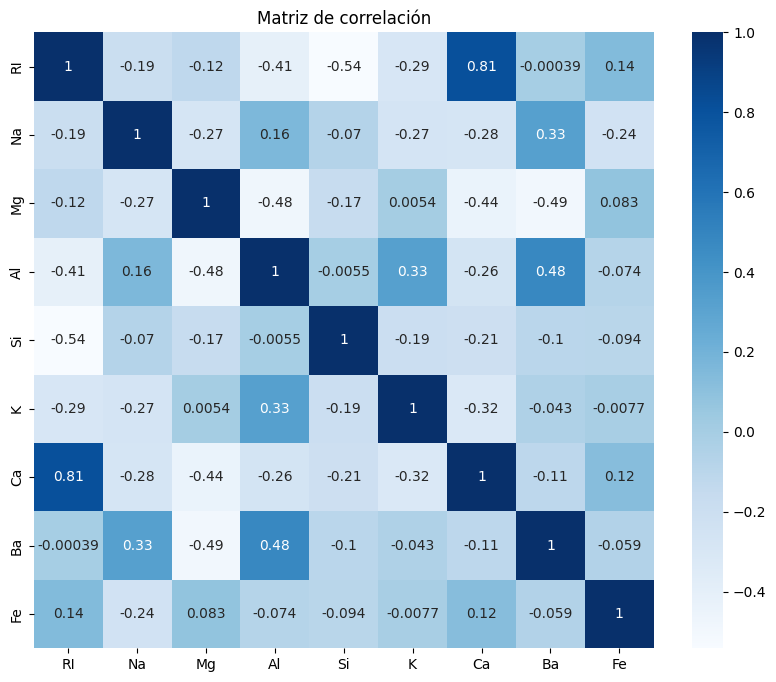

In [16]:
corr_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title("Matriz de correlación")

In [19]:
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

In [20]:
pca = PCA()
pca.fit(scaled_data)
pca_score = pd.DataFrame(data = pca.components_, columns = data.columns)

Text(0.5, 1.0, 'PCA Scores')

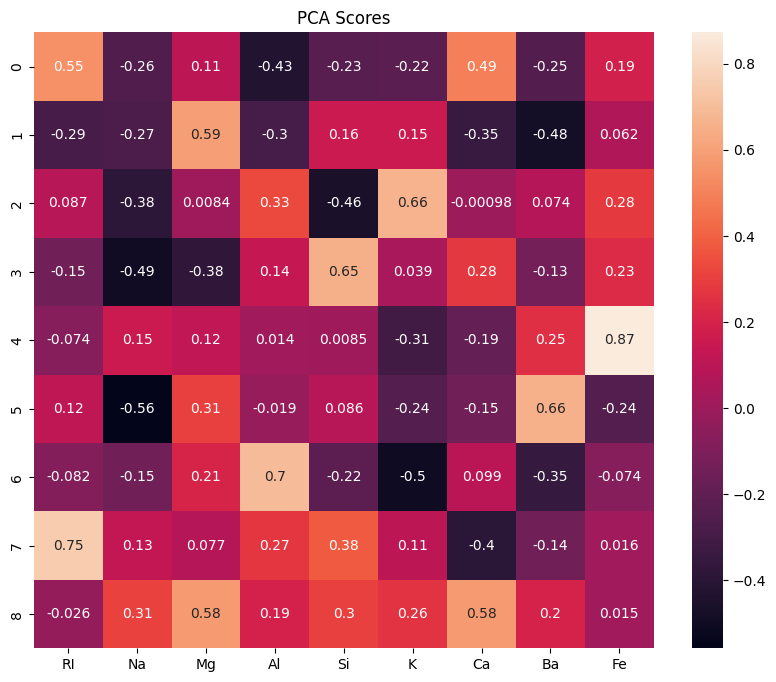

In [26]:
pca_score

plt.figure(figsize=(10, 8))
sns.heatmap(pca_score, annot=True)
plt.title("PCA Scores")

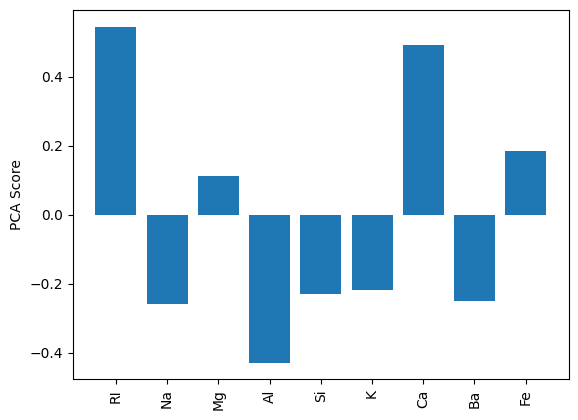

In [27]:
matrix_transform = pca.components_.T
plt.bar(np.arange(9), matrix_transform[:,0])
plt.xticks(range(len(data.columns)), data.columns, rotation = 90)
plt.ylabel('PCA Score')
plt.show()


In [29]:
top_vars_per_component = {}
for i in range(pca.n_components_):
    component = pd.Series(pca.components_[i], index=data.columns)
    sorted_component = component.abs().sort_values(ascending=False)
    top_vars_per_component[f'PCA{i+1}'] = sorted_component.index[:3].tolist()  # Top 3 variables
print("Variables de mayor aporte para los primeros componentes:", top_vars_per_component)

Variables de mayor aporte para los primeros componentes: {'PCA1': ['RI', 'Ca', 'Al'], 'PCA2': ['Mg', 'Ba', 'Ca'], 'PCA3': ['K', 'Si', 'Na'], 'PCA4': ['Si', 'Na', 'Mg'], 'PCA5': ['Fe', 'K', 'Ba'], 'PCA6': ['Ba', 'Na', 'Mg'], 'PCA7': ['Al', 'K', 'Ba'], 'PCA8': ['RI', 'Ca', 'Si'], 'PCA9': ['Ca', 'Mg', 'Na']}


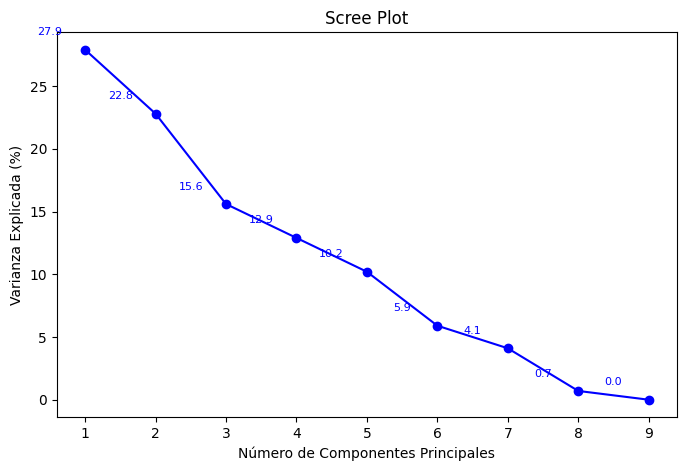

In [33]:
per_var=np.round(pca.explained_variance_ratio_*100, decimals=1)

#Scree plot para visualizar el porcentaje de varianza explicada
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(per_var) + 1), per_var, marker='o', linestyle='-', color='b')

for i, var in enumerate(per_var):
    plt.text(i + 0.5, var + 1,f"{var:.1f}", ha='center', va='bottom', fontsize=8, color="blue")

plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada (%)')
plt.title('Scree Plot')
plt.show()

In [35]:
porcent_acum = np.cumsum(per_var)
porcent_acum = np.minimum(porcent_acum, 100)  # Limita el máximo valor acumulado a 100%
for i, valor in enumerate(porcent_acum, start=1):
    print(f"Componente {i}: {valor:.2f}%")

Componente 1: 27.90%
Componente 2: 50.70%
Componente 3: 66.30%
Componente 4: 79.20%
Componente 5: 89.40%
Componente 6: 95.30%
Componente 7: 99.40%
Componente 8: 100.00%
Componente 9: 100.00%


In [36]:
threshold = 85  # umbral deseado
n_components = np.argmax(porcent_acum >= threshold) + 1
print(f"Número de componentes necesarios para capturar el {threshold}% de la varianza: {n_components}")

Número de componentes necesarios para capturar el 85% de la varianza: 5
